In [33]:
#----------------------------
# import libraries
#----------------------------
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#----------------------------
#use fixed point notation
np.set_printoptions(suppress=True)

In [2]:
def softmax(phi, w):
    # exponent matrix --> (phi @ w)
    exp_matrix = phi @ w
    # terms of exponent matrix --> exp(phi @ w)
    numerator = np.exp(exp_matrix)
    # sum of terms in exponent matrix --> exp(phi@w0) + ... + exp(phi@wK)
    # denominator of softmax function
    sum_numerator = np.sum(numerator, axis=1).reshape(-1,1)
    # copy sum (Nx1) in (K+1) columns
    denominator = np.repeat(sum_numerator, C, axis=1)
    # calculate softmax
    ŷ = numerator/denominator
    return ŷ

In [3]:
def counts(y):
    max_y = np.argmax(y, axis=1)
    classes, size = np.unique(max_y, return_counts=True)
    for i in range(len(classes)):
        print('label ', classes[i], ': ', size[i], sep='')

In [4]:
def max_pooling(y):
    # add one because output must go from 1 to 6
    y = np.argmax(y, axis=1) + 1
    y = y.reshape(-1,1)
    y = one_hot_encoder(y)
    return y

In [5]:
def zero_one_loss(y_true, y_pred):
    diff = (y_true - y_pred)
    # if class is right, row has only zeros
    # if class is wrong, real and predicted colums have values 0.5
    half = (diff * diff) / 2
    # sum rows
    row_sum = np.sum(half, axis=1)
    error = np.sum(row_sum)
    loss = error / len(y_true)
    return loss

In [6]:
def iterate(x, y, phi, w, alpha):
    # calculate estimated output
    ŷ = softmax(phi, w)
    # calculare error
    loss = zero_one_loss(y, ŷ)
    # calculate gradient
    gradient = (y - ŷ).T @ phi
    # update weights array
    w = w + (alpha * gradient.T)
    return w, loss

In [7]:
def train(x, y, w, alpha=1e-6, tolerance=0.05):
    # alpha: step size
    # tolerance: stop criteria
    #-----------------------------
    #w = np.random.rand(K+1, C)                 # create weights matrix
    phi = np.insert(X_train, 0, [1], axis=1)   # create phi matrix
    #-----------------------------    
    # error array initialization
    e = []       
    #-----------------------------
    # run algorithm first time
    w, loss = iterate(x, y, phi, w, alpha)
    e.append(loss)
    #-----------------------------
    # iterate until convergence
    while (loss > tolerance):
        w, loss = iterate(x, y, phi, w, alpha)
        e.append(loss)
    #-----------------------------        
    return w, e

In [38]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, title=None, normalize=False, cmap=plt.cm.Blues, figsize = (10,7), fontsize=14):
    # normalized or raw CM
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'
    #----------------------------
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt=fmt, cmap=cmap)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    #----------------------------
    # fix matplotlib bug
    #heatmap.get_ylim() --> (5.5, 0.5)
    heatmap.set_ylim(6.0, 0)
    #----------------------------
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

Weights array for each class:

$ \displaystyle w_C = \begin{bmatrix} w_0^{(C)} & w_1^{(C)} & ... & w_K^{(C)} \end{bmatrix}^T $
<br>
<br>

Weights matrix for all classes:

$ \displaystyle W = \begin{bmatrix} w_0 & w_1 & ... & w_C \end{bmatrix} = \begin{bmatrix} 
    w_0^{(0)} & w_0^{(1)} &   ...  & w_0^{(C)} \\ 
    w_1^{(0)} & w_1^{(1)} &   ...  & w_1^{(C)} \\
      \vdots  &   \vdots  & \ddots &   \vdots  \\
    w_K^{(0)} & w_K^{(1)} &   ...  & w_K^{(C)} \\
\end{bmatrix} $

$\phi$ shape: (N x K+1)

$W$ shape: (K+1 x C)

$\phi W$ shape: (N x C) $\rightarrow$ exponents of terms in softmax

$\nabla J_{CE} = (y - ŷ)^T \phi $

$ \displaystyle 
\nabla J_{CE} = \begin{bmatrix} 
    --- w_K^{(0)} --- \\ 
    --- w_K^{(1)} --- \\ 
    ---\space \space \vdots \space \space --- \\ 
    --- w_K^{(C)} --- \\ 
\end{bmatrix}
= 
\begin{bmatrix} 
    w_0^{(0)} & w_1^{(0)} &   ...  & w_{K+1}^{(0)} \\ 
    w_0^{(1)} & w_1^{(1)} &   ...  & w_{K+1}^{(1)} \\
      \vdots  &   \vdots  & \ddots &     \vdots    \\
    w_0^{(C)} & w_1^{(C)} &   ...  & w_{K+1}^{(C)} \\
\end{bmatrix} $

$\nabla J_{CE} $ shape: (C x K+1)

In [8]:
# path to save figures
path = 'figures/ex2-multiclass_classification/'
# read training data
X_train_df = pd.read_fwf('X_train.txt', header=None)
y_train_df = pd.read_csv('y_train.txt', header=None)
# read test data
X_test_df = pd.read_fwf('X_test.txt', header=None)
y_test_df = pd.read_csv('y_test.txt', header=None)

In [9]:
# convert DataFrame to NumPy array
X_train_raw = X_train_df.to_numpy()
X_test_raw = X_test_df.to_numpy()
y_train_raw = y_train_df.to_numpy()
y_test_raw = y_test_df.to_numpy()

**output** <br>
1 – caminhada <br>
2 – subindo escadas <br>
3 – descendo escadas <br>
4 – sentado <br>
5 – em pé <br>
6 – deitado <br>
<br>
**one-hot enconding** <br>
[1 0 0 0 0 0]$^T$: walking <br>
[0 1 0 0 0 0]$^T$: climbing stairs <br>
[0 0 1 0 0 0]$^T$: going down stairs <br>
[0 0 0 1 0 0]$^T$: seated <br>
[0 0 0 0 1 0]$^T$: standing <br>
[0 0 0 0 0 1]$^T$: lying <br>


In [10]:
enc = OneHotEncoder(categories='auto')
enc.fit(y_train_raw)
def one_hot_encoder(y):
    return enc.transform(y).toarray()
def one_hot_decoder(y):
    return enc.inverse_transform(y)

In [11]:
# data standardization: x' = (x - u) / s
scaler = StandardScaler()
#----------------------------
# join X_train and X_test
X_set_raw = np.append(X_train_raw, X_test_raw, axis=0)
# perform standardization with x data
scaler.fit(X_set_raw)
X_set = scaler.transform(X_set_raw)
# split X data again in train and test
X_train = X_set[:7352,:]
X_test = X_set[7352:,:]

In [12]:
# one-hot encoding
y_train = one_hot_encoder(y_train_df)
y_test = one_hot_encoder(y_test_df)

In [13]:
#----------------------------
# training
#----------------------------

In [14]:
x = X_train
y = y_train
# create phi matrix
phi = np.insert(X_train, 0, [1], axis=1)
#-----------------------------
# size of dataset
N = X_train.shape[0]
# number of features
K = X_train.shape[1]
# number of classes
C = len(enc.categories_[0])

In [15]:
# create weights matrix
w = np.random.uniform(-1,1, (K+1, C))
error = []

In [16]:
w, e = train(x, y, w, alpha=1e-6, tolerance=0.02)
error += e

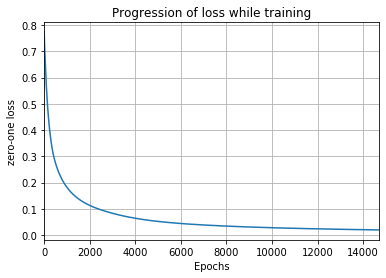

In [17]:
# plots
plt.plot(error)
plt.xlabel('Epochs')
plt.ylabel('zero-one loss')
plt.autoscale(axis='x', tight=True)
plt.title('Progression of loss while training')
plt.grid(True)
plt.savefig(path + 'zero_one_loss', dpi=300)
plt.show()

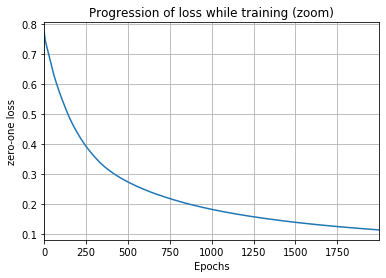

In [18]:
# plots
plt.plot(error[0:2000])
plt.xlabel('Epochs')
plt.ylabel('zero-one loss')
plt.autoscale(axis='x', tight=True)
plt.title('Progression of loss while training (zoom)')
plt.grid(True)
plt.savefig(path + 'zero_one_loss_zoom', dpi=300)
plt.show()

# Testing the model

In [58]:
x = X_test
y = y_test
# create phi matrix
phi = np.insert(x, 0, [1], axis=1)
ŷ = softmax(phi,w)
# naming arrays
y_pred = one_hot_decoder(max_pooling(ŷ))
y_true = y_test_raw

## Zero-one loss

In [42]:
zero_one_loss(y, max_pooling(ŷ))

0.09195792331184255

## Confusion Matrix

In [30]:
ŷ_dec = one_hot_decoder(max_pooling(ŷ))
cm = confusion_matrix(y_test_raw, ŷ_dec)
classes = np.array(['walking','climbing stairs','going down stairs','seated','standing','lying'])

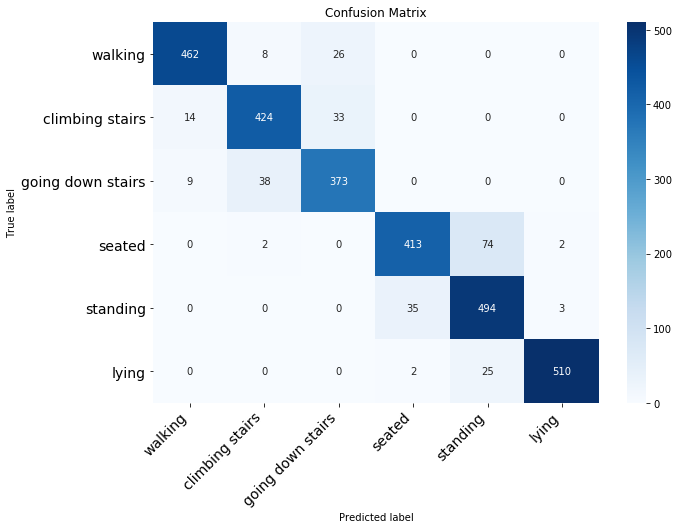

In [43]:
# CM raw
cm_raw = print_confusion_matrix(cm, classes, title='Confusion Matrix', normalize=False, cmap=plt.cm.Blues)
cm_raw.savefig(path + 'cm_raw', dpi=300, bbox_inches='tight')

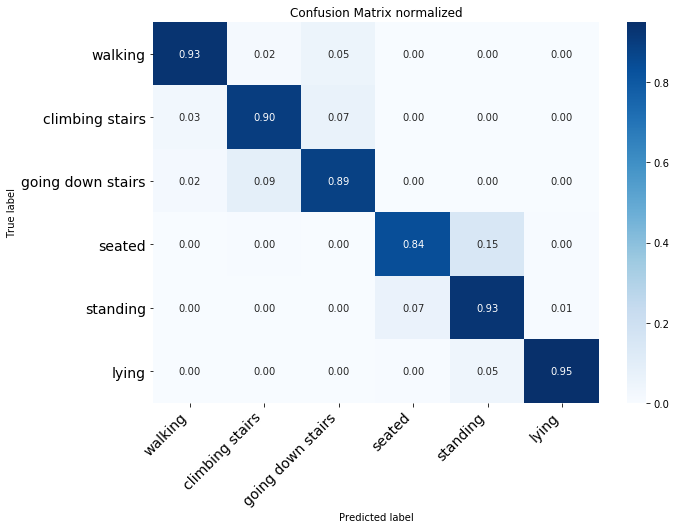

In [44]:
# CM normalized
cm_norm = print_confusion_matrix(cm, classes, title='Confusion Matrix normalized', normalize=True, cmap=plt.cm.Blues)
cm_norm.savefig(path + 'cm_norm', dpi=300, bbox_inches='tight')

## F1-score (macro, micro and weighted)

In [64]:
macro = f1_score(y_true, y_pred, average='macro')
micro = f1_score(y_true, y_pred, average='micro')
weighted = f1_score(y_true, y_pred, average='weighted')

In [67]:
print('F1-score macro =', macro)
print('F1-score micro =', micro)
print('F1-score weighted =', weighted)

F1-score macro = 0.9070556873288206
F1-score micro = 0.9080420766881574
F1-score weighted = 0.9085007078823099
